In [6]:
from utils import *

In [7]:
color_map = sns.color_palette("cubehelix", 3).as_hex()

hatch_map = ['', '/', '//']

# Set seaborn style
sns.set(style="whitegrid")

fontsize = 20

# Specify the filename
environments = ['high', 'low', 'downstair']
methods = ["fft", "classic_music", "novel_music"]
fft_env_error = {}
old_music_env_error = {}
novel_music_env_error = {}

path = './Data/fig11'
for method in methods:
    for env in environments:
        filename = f'ab_{env}_mp_angle_error_{method}.json'

        # Read the JSON file into a dictionary
        with open(os.path.join(path, filename), 'r') as file:
            data = json.load(file)
        if method == "classic_music":
            old_music_env_error[env] = data
        elif method == "novel_music":
            novel_music_env_error[env] = data
        elif method == "fft":
            fft_env_error[env] = data
        # Print the dictionary
        print(data)

{'5000000000000.0': {'-20': [40.993448036110436, 41.924120843380344, 45.979970737477245, 45.979970737477245, 46.470521862456636, 32.33761663515784, 35.82218651487776, 35.82218651487776, 16.306516305198343, 43.123151828956985, 40.15727846481532, 43.837946800098614, 35.9233551406691, 34.07820532956351, 40.9546204927894, 38.01721680120933, 16.73437809131596, 16.73437809131596, 45.39353953033586, 52.88073852964345, 37.57797684980148, 37.29608796368559, 36.627527476197926, 18.664211558206347, 42.44071414005637, 5.777825635369755, 19.327877723980166, 17.91525364655657, 21.448909464351274, 14.111862953954763], '-30': [61.12260162303915, 61.12260162303915, 61.12260162303915, 61.12260162303915, 60.000744806472895, 60.000744806472895], '10': [17.70330235525852, 0.6795570837788816, 17.098393434331403, 17.098393434331403, 0.2610505366178799, 0.2610505366178799, 0.5180167703444489, 9.62833927503837, 5.7934294360832626, 14.528561919173587, 0.4557726565379454, 1.405762001186238, 12.345291684638127, 3

In [8]:
import numpy as np
angles = [-20, -10, 0, 10, 20]
fft_error_forangle_env = {}
old_music_error_forangle_env = {}
novel_music_error_forangle_env = {}

for method in methods:
    for env in environments:
        print(f'Environment: {env}')
        if method == "classic_music":
            data = old_music_env_error[env]['5000000000000.0']
        elif method == "novel_music":
            data = novel_music_env_error[env]['5000000000000.0']
        elif method == "fft":
            data = fft_env_error[env]['5000000000000.0']
        error_list = []
        for angle in angles:
            if str(angle) not in data:
                continue
            error_list.extend(data[str(angle)])
        if method == "classic_music":
            old_music_error_forangle_env[env] = error_list
        elif method == "novel_music":
            novel_music_error_forangle_env[env] = error_list
        elif method == "fft":
            fft_error_forangle_env[env] = error_list

Environment: high
Environment: low
Environment: downstair
Environment: high
Environment: low
Environment: downstair
Environment: high
Environment: low
Environment: downstair


In [9]:
import pandas as pd

fft_slope_error_env = {}
old_music_slope_error_env = {}
novel_music_slope_error_env = {}
# Read the grouped data from the CSV file
for method in methods:
    for env in environments:
        loaded_data = pd.read_csv(f'{path}/ab_{env}_slope_error_{method}.csv', index_col=0)
        
        # Display the loaded data
        for key in loaded_data.keys():
            print(f'Key: {key}')
            print(loaded_data[key][5000000000000])
        if method == "classic_music":
            old_music_slope_error_env[env] = loaded_data[key][5000000000000]
        elif method == "novel_music":
            novel_music_slope_error_env[env] = loaded_data[key][5000000000000]
        elif method == "fft":
            fft_slope_error_env[env] = loaded_data[key][5000000000000]

Key: Percentage Error
[29.131632591216427, 5.948359995755879, 32.19124096722302, 32.19124096722302, 29.88523071338553, 33.89437272332522, 10.93717956451543, 10.93717956451543, 0.8340231037661329, 33.66075730545279, 5.684600652996719, 6.958181479462519, 28.96584100433921, 28.96584100433921, 28.96584100433921, 28.96584100433921, 30.299709680578545, 30.299709680578545, 30.65390079799803, 2.0623880429017967, 31.656186300482947, 4.968682436936055, 0.4120081553514453, 0.4120081553514453, 11.216010869718007, 31.008091915417506, 6.279943169510313, 32.01791339912413, 2.7406263528539845, 0.1004385677235547, 1.517203037401504, 32.53789610342081, 1.2485020709591406, 3.6072641933484766, 34.105380197532575, 4.285502503300684, 6.686886155481621, 31.196491445959783, 11.351658531708477, 11.351658531708477, 19.312249059352844, 10.959787508180527, 55.899437890663386, 0.5551917985635743, 56.19334115830934, 19.289641115687772, 33.30656618803331, 33.30656618803331, 31.528074619714197, 29.621471370626338, 10

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Define environments and methods
environments = ['high', 'low', 'downstair']
methods = ["fft", "classic_music", "novel_music"]

# Initialize dictionaries to store the slope errors for each method and environment
slope_error_env = {method: {} for method in methods}

# Read the grouped data from the CSV file
for method in methods:
    for env in environments:
        loaded_data = pd.read_csv(f'{path}/ab_{env}_slope_error_{method}.csv', index_col=0)
        
        for key in loaded_data.keys():
            slope_error_env[method][env] = loaded_data[key][5000000000000]

# Set seaborn style
sns.set(style="whitegrid")
fontsize = 20

# Define labels for the environments
labels = ["Corridor\n(High)", "Lab Space\n(Medium)", "Lobby\n(Low)"]
# Function to clean NaN values and calculate statistics
def clean_nan_and_calc_stats(slope_error_env, method):
    median_values = [np.median(ast.literal_eval(slope_error_env[method][env])) for env in environments]
    q1_values = [np.percentile(ast.literal_eval(slope_error_env[method][env]), 25) for env in environments]
    q3_values = [np.percentile(ast.literal_eval(slope_error_env[method][env]), 75) for env in environments]
    
    # Calculate error bars (distance from median to Q1 and Q3)
    lower_error = [median - q1 for median, q1 in zip(median_values, q1_values)]
    upper_error = [q3 - median for median, q3 in zip(median_values, q3_values)]
    iqr_error = [lower_error, upper_error]
    
    return median_values, iqr_error

# Calculate stats for each method
stats = {method: clean_nan_and_calc_stats(slope_error_env, method) for method in methods}


/var/folders/b8/hkb_33g56ysdqtzxhgm3bg640000gn/T/ipykernel_50891/3961050054.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=fontsize)
/var/folders/b8/hkb_33g56ysdqtzxhgm3bg640000gn/T/ipykernel_50891/3961050054.py:46: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.2)
/var/folders/b8/hkb_33g56ysdqtzxhgm3bg640000gn/T/ipykernel_50891/3961050054.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize)
/var/folders/b8/hkb_33g56ysdqtzxhgm3bg640000gn/T/ipykernel_50891/3961050054.py:115: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; n

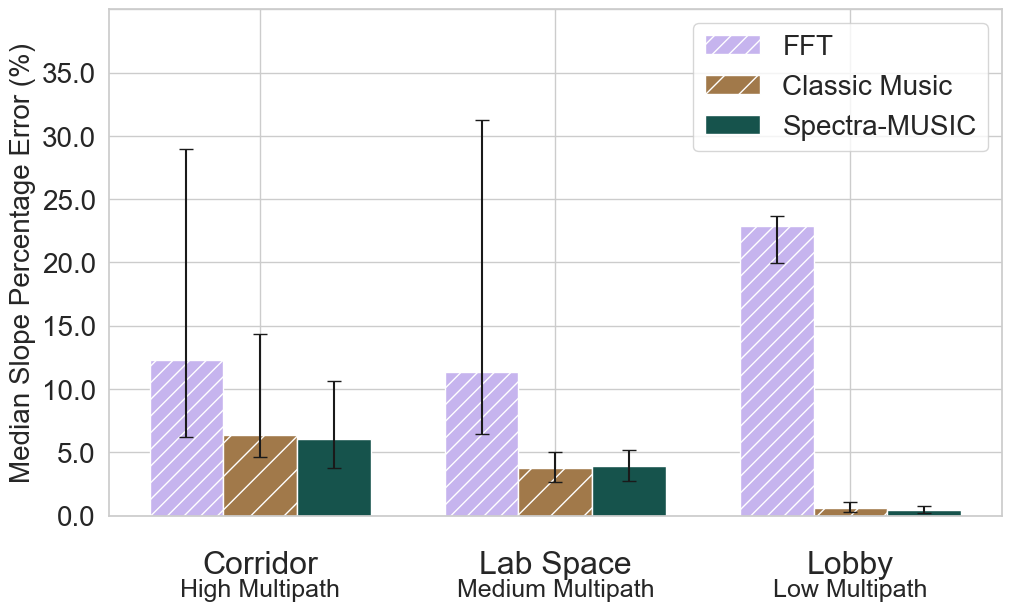

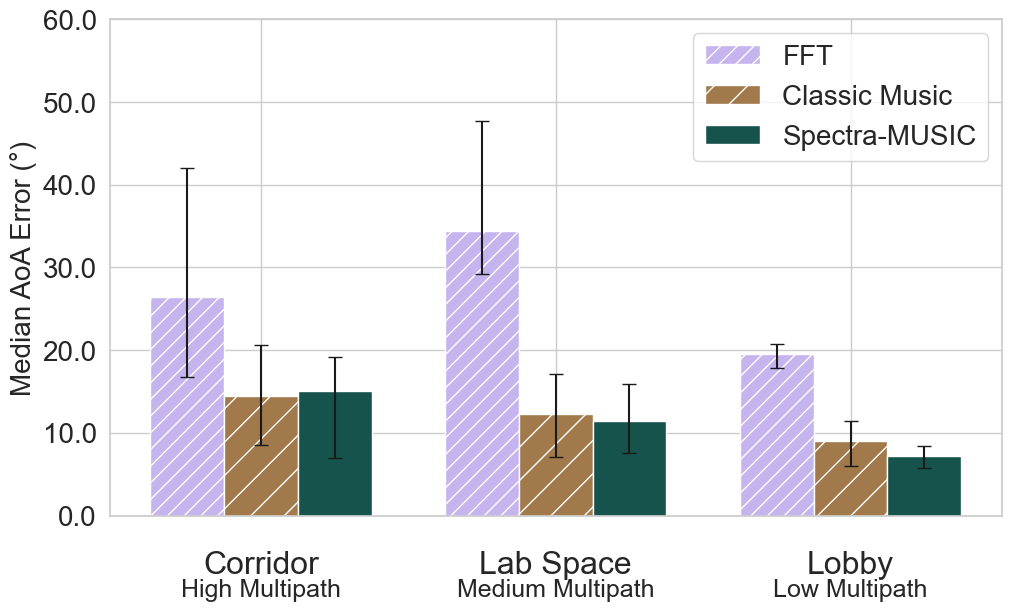

In [11]:
slope_stats = stats

# Define environments and methods
environments = ['high', 'low', 'downstair']
methods = ["fft", "classic_music", "novel_music"]

# Create labels with proper alignment
locations = ['Corridor', 'Lab Space', 'Lobby']
descriptions = ['High Multipath', 'Medium Multipath', 'Low Multipath']

# Set up the bar width and positions for grouped bars
bar_width = 0.25
positions = np.arange(len(locations))

# Common settings
fontsize = 20  # Using the fontsize variable from your original code
methods_renamed = ["FFT", "Classic Music", "Spectra-MUSIC"]

# Figure 1: Slope Percentage Error
fig1 = plt.figure(figsize=(10, 6), constrained_layout=True)
ax1 = fig1.add_subplot(111)

for i, method in enumerate(methods):
    ax1.bar(positions + i * bar_width, slope_stats[method][0], yerr=slope_stats[method][1], 
            width=bar_width, capsize=5, label=methods_renamed[i], color=color_map[2-i], hatch=hatch_map[2-i])

# Create custom x-tick labels
ax1.set_xticks(positions + bar_width)
ax1.set_xticklabels([])  # Empty labels first

# Add properly centered multi-size labels
for i, (loc, desc) in enumerate(zip(locations, descriptions)):
    ax1.annotate(loc, xy=(positions[i] + bar_width, 0), xycoords=('data', 'axes fraction'),
                xytext=(0, -25), textcoords='offset points', ha='center', va='top', fontsize=23)
    ax1.annotate(desc, xy=(positions[i] + bar_width, 0), xycoords=('data', 'axes fraction'),
                xytext=(0, -45), textcoords='offset points', ha='center', va='top', fontsize=18)

# Rest of the plotting code for the first subplot
ax1.set_yticklabels(ax1.get_yticks(), fontsize=fontsize)
ax1.set_ylabel('Median Slope Percentage Error (%)', fontsize=fontsize)
ax1.set_ylim(0, 40)
ax1.legend(fontsize=fontsize, loc='upper right')
ax1.grid(True)

# Adjust bottom margin to make room for the labels
plt.subplots_adjust(bottom=0.2)

# Figure 2: AoA Error
fig2 = plt.figure(figsize=(10, 6), constrained_layout=True)
ax2 = fig2.add_subplot(111)

labels = ["Corridor", "Lab Space", "Downstairs"]

# Clean NaN values for each method and environment
def clean_nan(data):
    return [x for x in data if not np.isnan(x)]

# Cleaned data for FFT method
fft_high_clean = clean_nan(fft_error_forangle_env['high'])
fft_med_clean = clean_nan(fft_error_forangle_env['low'])
fft_low_clean = clean_nan(fft_error_forangle_env['downstair'])

# Cleaned data for Old Music method
old_high_clean = clean_nan(old_music_error_forangle_env['high'])
old_med_clean = clean_nan(old_music_error_forangle_env['low'])
old_low_clean = clean_nan(old_music_error_forangle_env['downstair'])

# Cleaned data for Novel Music method
novel_high_clean = clean_nan(novel_music_error_forangle_env['high'])
novel_med_clean = clean_nan(novel_music_error_forangle_env['low'])
novel_low_clean = clean_nan(novel_music_error_forangle_env['downstair'])

# Group cleaned data
fft_values = [fft_high_clean, fft_med_clean, fft_low_clean]
old_values = [old_high_clean, old_med_clean, old_low_clean]
novel_values = [novel_high_clean, novel_med_clean, novel_low_clean]

# Calculate medians, Q1, and Q3 for each method and environment
def calc_stats(values):
    medians = [np.median(val) for val in values]
    q1 = [np.percentile(val, 25) for val in values]
    q3 = [np.percentile(val, 75) for val in values]
    iqr_error = [np.subtract(medians, q1), np.subtract(q3, medians)]
    return medians, iqr_error

fft_medians, fft_iqr_error = calc_stats(fft_values)
old_medians, old_iqr_error = calc_stats(old_values)
novel_medians, novel_iqr_error = calc_stats(novel_values)

ax2.bar(positions, fft_medians, yerr=fft_iqr_error, width=bar_width, capsize=5, 
        label='FFT', color=color_map[2], hatch=hatch_map[2])
ax2.bar(positions + bar_width, old_medians, yerr=old_iqr_error, width=bar_width, capsize=5, 
        label='Classic Music', color=color_map[1], hatch=hatch_map[1])
ax2.bar(positions + 2 * bar_width, novel_medians, yerr=novel_iqr_error, width=bar_width, capsize=5, 
        label='Spectra-MUSIC', color=color_map[0], hatch=hatch_map[0])

# Set custom x-tick labels for the second subplot
ax2.set_xticks(positions + bar_width)
ax2.set_xticklabels([])  # Empty labels first

# Add properly centered multi-size labels for second subplot
for i, (loc, desc) in enumerate(zip(locations, descriptions)):
    ax2.annotate(loc, xy=(positions[i] + bar_width, 0), xycoords=('data', 'axes fraction'),
                xytext=(0, -25), textcoords='offset points', ha='center', va='top', fontsize=23)
    ax2.annotate(desc, xy=(positions[i] + bar_width, 0), xycoords=('data', 'axes fraction'),
                xytext=(0, -45), textcoords='offset points', ha='center', va='top', fontsize=18)

ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize)
ax2.set_ylabel('Median AoA Error (°)', fontsize=fontsize)
ax2.set_ylim(0, 60)
ax2.legend(fontsize=fontsize)
ax2.grid(True)

# Adjust bottom margin to make room for the labels
plt.subplots_adjust(bottom=0.2)

# Show all figures (optional)
plt.show()